![Free Body Diagram](Free_body_diagram.png)

*Ground reaction force [GRF]*

GRF exists <u>only in the stance phase</u> : 
* First peak of the <u>vertical GRF</u> occurs at 15% of the gait cycle.
* Second peak, the maximum vertical GRF occurs at the 48% of the gait cycle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks

In [4]:
df = pd.read_excel('gait_data.xls', header=0, engine='xlrd')
print(df)

    gait_%  GRFz[%BW]  GRFx[%BW]  MX_F[Nm/kg]  Flex_Ext_F[deg]  MX_K[Nm/kg]  \
0        0   8.242780   0.679562    -0.000292       111.796565     0.110179   
1        1  19.277127   0.565303    -0.015100       111.761732     0.297318   
2        2  32.449699  -1.766094    -0.054829       112.366473     0.330485   
3        3  45.423310  -5.831043    -0.124177       114.080546     0.245287   
4        4  57.844646  -9.759279    -0.192977       116.236460     0.139773   
..     ...        ...        ...          ...              ...          ...   
95      95   0.000000   0.000000     0.000000       113.558731     0.000000   
96      96   0.000000   0.000000     0.000000       113.580242     0.000000   
97      97   0.000000   0.000000     0.000000       113.440590     0.000000   
98      98   0.000000   0.000000     0.000000       113.190817     0.000000   
99      99   0.000000   0.000000     0.000000       112.860078     0.000000   

    Flex_Ext_K[deg]  MX_H[Nm/kg]  Flex_Ext_H[deg]  

Peak value: 116.59458625793455 at gait %: 15
Peak value: 113.99319592285156 at gait %: 48


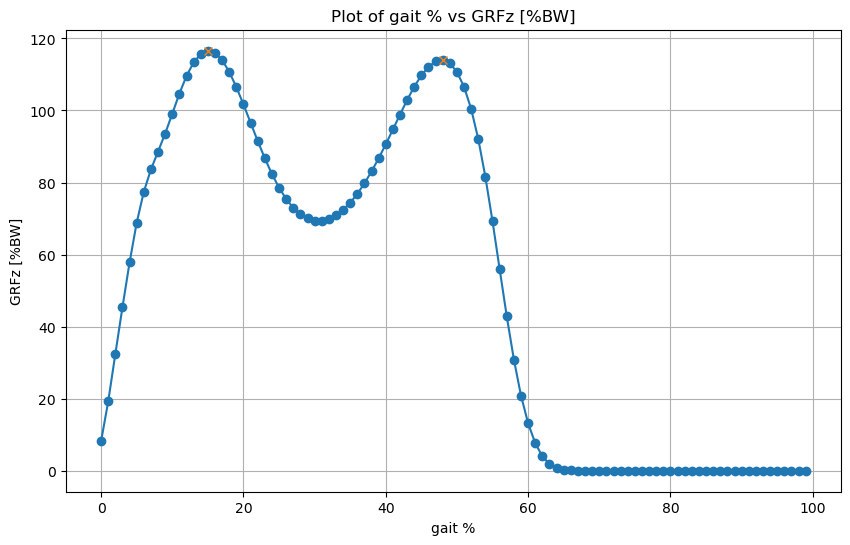

In [8]:
# Ensure data is 1D before plotting
gait_percentage = df['gait_%'].values
grfz_bwf = df['GRFz[%BW]'].values

# Find peaks in the plots
peaks, _ = find_peaks(grfz_bwf, height=20)

# Find peak max values
peak_values = grfz_bwf[peaks]
peak_gait_percentages = gait_percentage[peaks]
sorted_indices = peak_values.argsort()[-2:][::-1] 
# Get indices of the two largest peaks 
for idx in sorted_indices:
    print(f'Peak value: {peak_values[idx]} at gait %: {peak_gait_percentages[idx]}')

# Plotting the first two columns
plt.figure(figsize=(10, 6))
plt.plot(gait_percentage, grfz_bwf, marker='o')
plt.title('Plot of gait % vs GRFz [%BW]')
plt.xlabel('gait %')
plt.ylabel('GRFz [%BW]')
plt.plot(peaks, grfz_bwf[peaks], "x")
plt.grid(True)
plt.show()

Since we are working on Anterior-Posterior direction. However the variation of forces is minimum as compared to perdominant forces vertical component of the ground reaction force. The variation of the ground reaction forces along the Anterior-Posterior direction is ploted below. 

Peak value: 22.320469248453776 at gait %: 53
Minimum peak value: -21.782597255706786 at gait %: 11


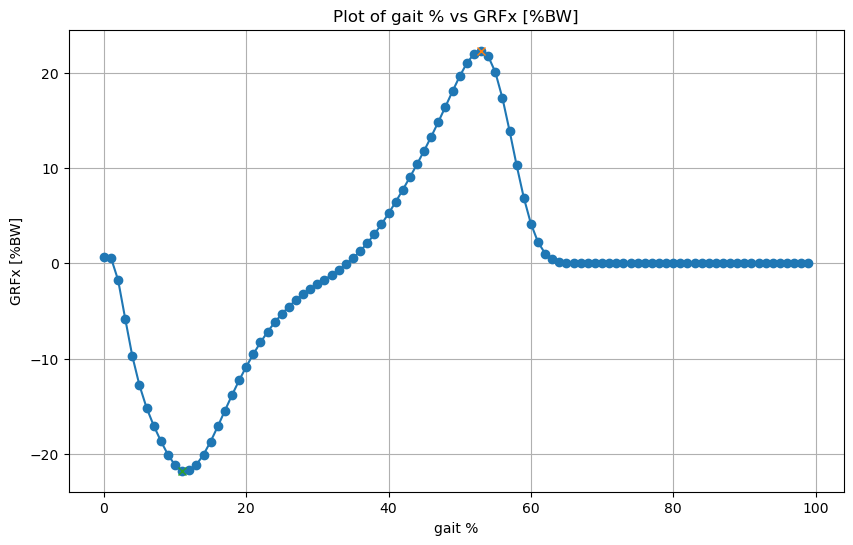

In [7]:
# Ensure data is 1D before plotting
gait_percentage = df['gait_%'].values
grfx_bwf = df['GRFx[%BW]'].values

# Find peaks in the plots
peaks, _ = find_peaks(grfx_bwf, height=20)

# Find peak max values
peak_values = grfx_bwf[peaks]
peak_gait_percentages = gait_percentage[peaks]
sorted_indices = peak_values.argsort()[-2:][::-1] 
# Get indices of the two largest peaks 
for idx in sorted_indices:
    print(f'Peak value: {peak_values[idx]} at gait %: {peak_gait_percentages[idx]}')

# Find the minimum value
min_peak_value = grfx_bwf.min() 
min_peak_index = grfx_bwf.argmin() 
min_peak_gait_percentage = gait_percentage[min_peak_index]

# Print the minimum peak value and its corresponding gait percentage 
print(f'Minimum peak value: {min_peak_value} at gait %: {min_peak_gait_percentage}')

# Plotting the first two columns
plt.figure(figsize=(10, 6))
plt.plot(gait_percentage, grfx_bwf, marker='o')
plt.title('Plot of gait % vs GRFx [%BW]')
plt.xlabel('gait %')
plt.ylabel('GRFx [%BW]')
plt.plot(peaks, grfx_bwf[peaks], "x")
plt.plot(min_peak_gait_percentage,min_peak_value,"x" )
plt.grid(True)
plt.show()


Here you can see that the peak in upper half is **Anterior** and lower half is **Posterior**.
* First peak the minimum occurs at 11% of the gait cycle.
* Second peak, the maximum occurs at the 53% of the gait cycle.

which tells that magnitute of force is far less than that of the predominat vertical component of ground reaction force.

**NOTE** for me (I keep forgetting this): Proximal = Toward the trunk (Proximal = Proximity)[down to up], Distal = Away from the trunk (Distal = Distant) [up to down]


We have body weight of $m_b = 100 $ Kg 

| Segment | Mass in Kg |
|----------|----------|
| Thigh   | $m_1 = 0.09 \cdot bodyweigght + 0.73 = 9.73$   |
| Shank  | $m_2 = 0.055 \cdot bodyweight - 0.43 = 5.07$   |
|Foot |$m_3 = 0.001 \cdot bodyweight + 0.34 = 0.44$ |


| Variable | Description |
|----------|----------|
|$r_H$|Position vector of hip w.r.t reference coordinate system|
| $m_b$    | Mass of body in Kg  |
| $m_1$ | Mass of Thigh in Kg   |
|$m_2$ |Mass of shank in Kg |
|$m_3$|Mass of foot in Kg|
|$H$|Hip joint|
|$K$|Knee joint|
|$O$|Thigh|
|$U$|Shank|
|$S$|Centre of Mass of Foot|
|$SO$|Center of Mass of Thigh|
|$SU$|Center of Masss of Shank|
|$J_1$|Moment of Inertia of Thigh|
|$J_2$|Moment of Inertia of Shank|
|$\alpha_H$| Flexion / Extension Angle of the Hip|
|$\alpha_K$| Flexion / Extension Angle of the Knee|
|$q_1$| Extension angle of **Hip** around the transversal axis (xy-plane)|
|$q_2$|Extension angle of **Knee** around the transversal axis (xy-plane)|
|$\omega_1$|Angular velocity of Thigh|
|$\omega_2$|Angular velocity of Shank|


|Segment| Segment Weight [kg]| Segment length [m] | Radius of Gyration [m] |
|------------|-----------------|-----------------|---------------|
|Thigh|9.73|0.410|0.323 $\cdot$ 410 = 0.132|
|Shank|5.07|0.415|0.303 $\cdot$ 415 = 0.125|

